# 시계열 분석

- 어떤 현상에 대해서 시간의 변화량을 기록한 시계열 자료를 대상으로 미래의 변화에 대한 추세를 분석하는 방법
- 시간의 경과에 따라서 연속적으로 관측값을 기록하고 있기 때문에 이러한 특성을 이용하여 시간 경과에 따른 관측값의 변화를 패턴으로 인식해서 시계열 모형을 추정하고, 이 모형을 통해서 미래의 변화를 추정하는 분석 방법
- 회귀분석과 동일하게 설명변수와 반응변수를 토대로 유의수준에 의해서 판단하는 추론통계방식

- 시계열분석의 적용 범위
  - 회귀분석은 데이터의 분포나 두 데이터 간의 상관성을 토대로 분석하지만, 시계열분석은 어떤 시간의 변화에 따라 현재 시점의 자료와 이전 시점의 자료 간의 상관성을 토대로 분석한다. 
  - 기존의 예측분석과는 달리 시간을 축으로 변화하는 통계량의 현상을 파악하여 가까운 미래를 추정하는 도구로 적합하다. 
  - 반대로 먼 미래를 예측하는 도구로 활용할 경우 실패할 확률이 높다. 
    - 시간의 결과에 따라 오차가 중첩되기 때문에 분산이 증가하여 예측력이 떨어지는 것이다.

- 시계열 자료 분석
  - 정상성 시계열과 비정상성 시계열로 구분.
  - 대부분의 시계열 자료는 비정상성 시계열 자료를 갖는다. 

- 어떤 시계열 자료의 변화 패턴이 일정한 평균값을 중심으로 일정한 변동 폭을 갖는 시계열일 때 그 자료를 정상성 시계열이라고 한다.
- 예를 들어, 시간의 추이와 관계없이 평균과 분산이 일정한 정상성 시계열이 있다. 
- 정상성 시계열이 아닌 나머지 시계열 자료들은 비정상성 시계열이라고 부른다. 대부분이 이에 속한다. 

- 정상성 시계열은 평균이 0이며, 일정한 분산을 갖는 정규분포에서 추출된 임의의 값으로 불규칙성(독립적)을 갖는 데이터로 정의할 수 있다. 
- 이러한 불규칙성을 갖는 패턴을 백색 잡음이라고 부른다.

- 반면, 비정상성 시계열은 규칙성(비독립적)을 갖는 패턴으로 시간의 추이에 따라서 점진적으로 증가하거나 하강하는 추세의 규칙, 일정한 주기 단위로 동일한 규칙이 반복되는 계절성의 규칙을 보인다. 이러한 비정상성 시계열은 시계열 자료의 추세선, 시계열 요소 분해 그리고 자기 상관 함수의 시각화 등을 통해서 확인할 수 있다. 

- 한편 시계열 자료가 비정상성 시계열이면 정상성 시계열로 변화시켜야 시계열 모형을 생성할 수 있다. 
  - 차분, 로그변환을 통해 정상성 시계열로 변환할 수 있다. 
  - 차분 : 현재 시점에서 이전 시점의 자료를 빼는 연산으로 평균을 정상화하는 데 이용되고, 로그변환은 log() 함수를 이용하여 분산을 정상화하는 데 이용한다. 

---

- 비정상성 시계열을 정상성 시계열로 변경

In [1]:
data(AirPassengers)

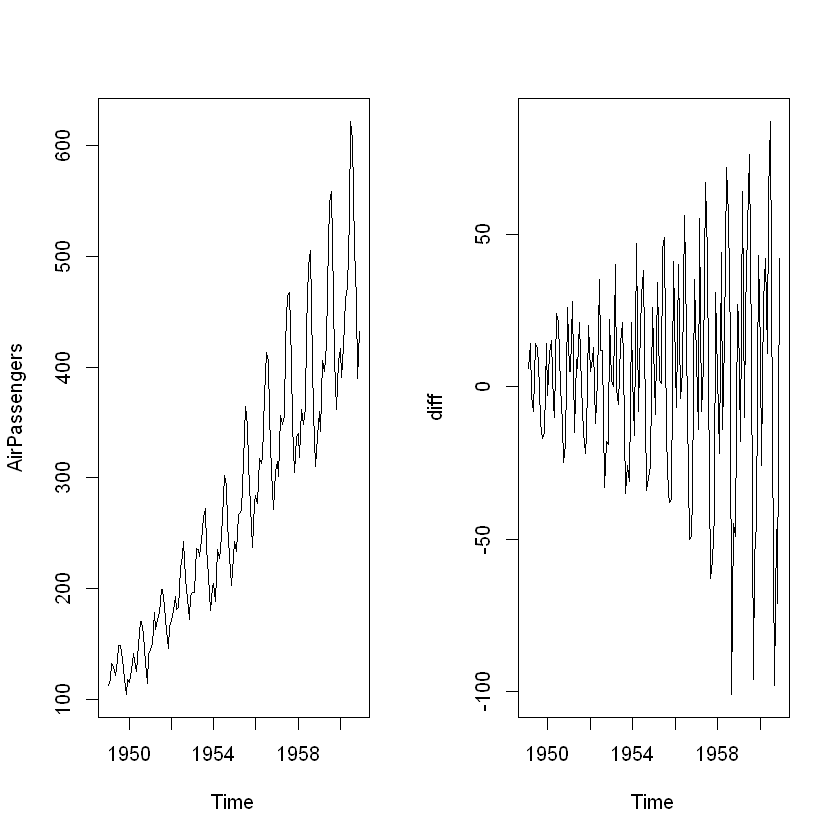

In [2]:
# 차분 적용 - 평균 정상화
par(mfrow = c(1,2))
ts.plot(AirPassengers) # 시계열 시각화
diff = diff(AirPassengers) # 차분 수행
plot(diff) # 평균 정상화

In [4]:
diff

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,,6,14,-3,-8,14,13,0,-12,-17,-15,14
1950,-3,11,15,-6,-10,24,21,0,-12,-25,-19,26
1951,5,5,28,-15,9,6,21,0,-15,-22,-16,20
1952,5,9,13,-12,2,35,12,12,-33,-18,-19,22
1953,2,0,40,-1,-6,14,21,8,-35,-26,-31,21
1954,3,-16,47,-8,7,30,38,-9,-34,-30,-26,26
1955,13,-9,34,2,1,45,49,-17,-35,-38,-37,41
1956,6,-7,40,-4,5,56,39,-8,-50,-49,-35,35
1957,9,-14,55,-8,7,67,43,2,-63,-57,-42,31
1958,4,-22,44,-14,15,72,56,14,-101,-45,-49,27


- 차분을 수행한 결과가 대체로 일정한 값을 얻으면 선형의 추세를 갖는다는 판단을 할 수 있을 것이다. 
- 만약 시계열에 계절성(일정한 주기 단위로 규칙이 발생)이 있으면 계절 차분을 수행하여 정상성 시계열로 변환한다. 
- 또한 차분된 것을 다시 차분했을 때 일정한 값들을 보인다면 그 시계열 자료는 2차 식의 추세를 갖는다고 판단한다.

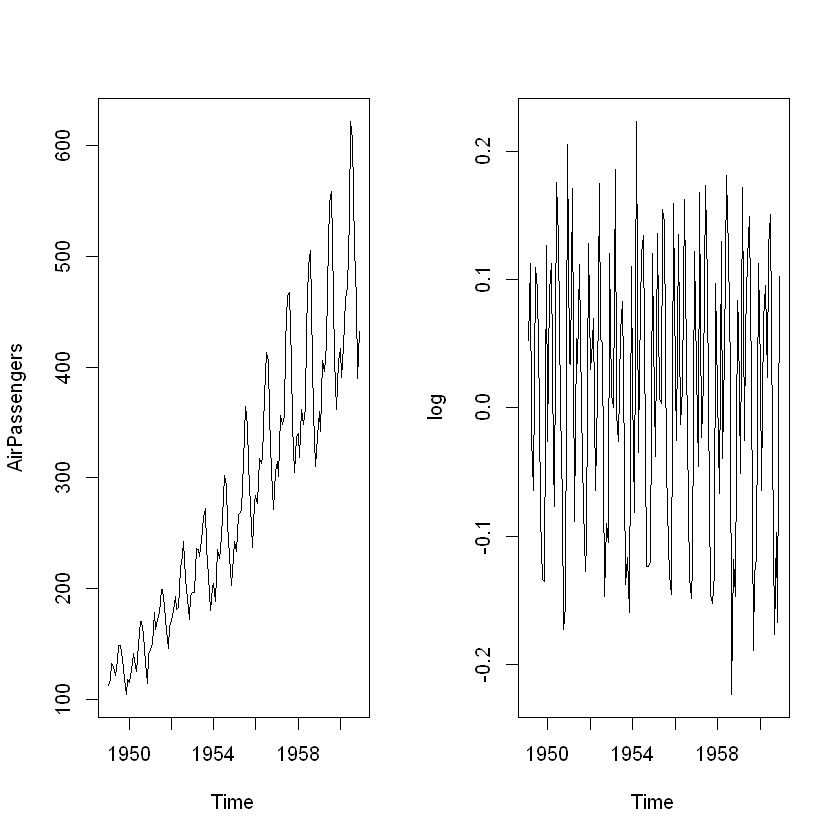

In [5]:
# 로그 적용 - 분산 정상화
par(mfrow = c(1,2)) 
plot(AirPassengers)
log = diff(log(AirPassengers)) # 로그 + 차분 수행
plot(log) # 분산 정상화

- 시계열 자료를 대상으로 대수를 취한 값들(log)의 1차 차분이 일정한 값을 갖는 경우 분산이 정상화되었다고 판단할 수 있다. 또한, 시계열의 추세를 찾아낸 후에는 원 시계열에서 추세를 제거함으로 추세가 없는 시계열의 형태로 나타나면 정상적 시계열로 볼 수 있다. 

---

- 시계열분석에서 시계열자료의 특징을 정확히 파악한다면 해당 자료에 대한 적합한 분석 방법을 선택하는 데 많은 도움이 된다.
- 따라서 시계열 자료를 이해하는 데 도움이 될 수 있는 시각화 방법에 대해서 알아보자

- 시계열 추세선 시각화
  - 추세 : 어떤 현상이 일정한 방향으로 나아가는 경향, 어느 기간동안 같은 방향으로 움직이는 경향을 의미
  - 이러한 추세선을 통해서 어느 정도 평균과 분산을 확인할 수 있다. 

In [10]:
data(WWWusage) # 인터넷 사용시간 데이터 셋
str(WWWusage) # 데이터 셋 구조 보기

 Time-Series [1:100] from 1 to 100: 88 84 85 85 84 85 83 85 88 89 ...


In [11]:
WWWusage

A Time Series:
  [1]  88  84  85  85  84  85  83  85  88  89  91  99 104 112 126 138 146 151
 [19] 150 148 147 149 143 132 131 139 147 150 148 145 140 134 131 131 129 126
 [37] 126 132 137 140 142 150 159 167 170 171 172 172 174 175 172 172 174 174
 [55] 169 165 156 142 131 121 112 104 102  99  99  95  88  84  84  87  89  88
 [73]  85  86  89  91  91  94 101 110 121 135 145 149 156 165 171 175 177 182
 [91] 193 204 208 210 215 222 228 226 222 220

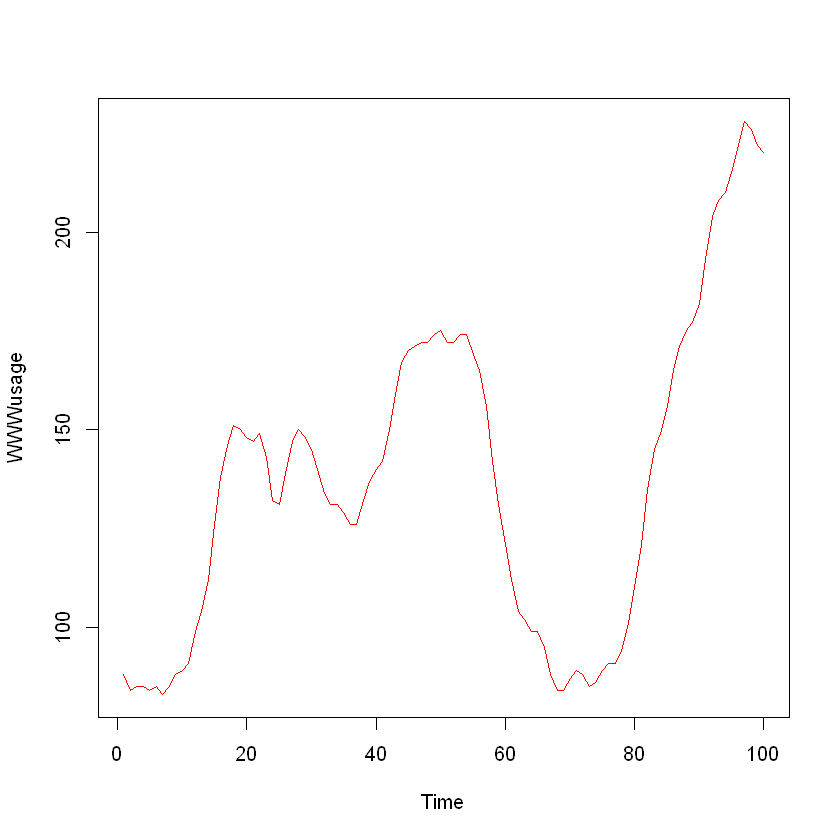

In [14]:
# 시계열 자료 추세선 시각화
X11()
ts.plot(WWWusage, type = 'l', col = 'red')

- 다중 시계열 자료 시각화
  - 유럽 국가들의 주요 주식에 대한 일일 마감 가격이 기록되어 있는 데이터 셋을 대상으로 단일과 다중 시계열 자료 추세선을 그려보자

In [15]:
data(EuStockMarkets)
head(EuStockMarkets,3)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2


In [17]:
# 데이터 프레임으로 변환
EuStock = data.frame(EuStockMarkets)
head(EuStock)

,DAX,SMI,CAC,FTSE
,<dbl>,<dbl>,<dbl>,<dbl>
1,1628.75,1678.1,1772.8,2443.6
2,1613.63,1688.5,1750.5,2460.2
3,1606.51,1678.6,1718.0,2448.2
4,1621.04,1684.1,1708.1,2470.4
5,1618.16,1686.6,1723.1,2484.7
6,1610.61,1671.6,1714.3,2466.8


- 단일 시계열 자료 추세선 시각화(1000개 데이터 대상)

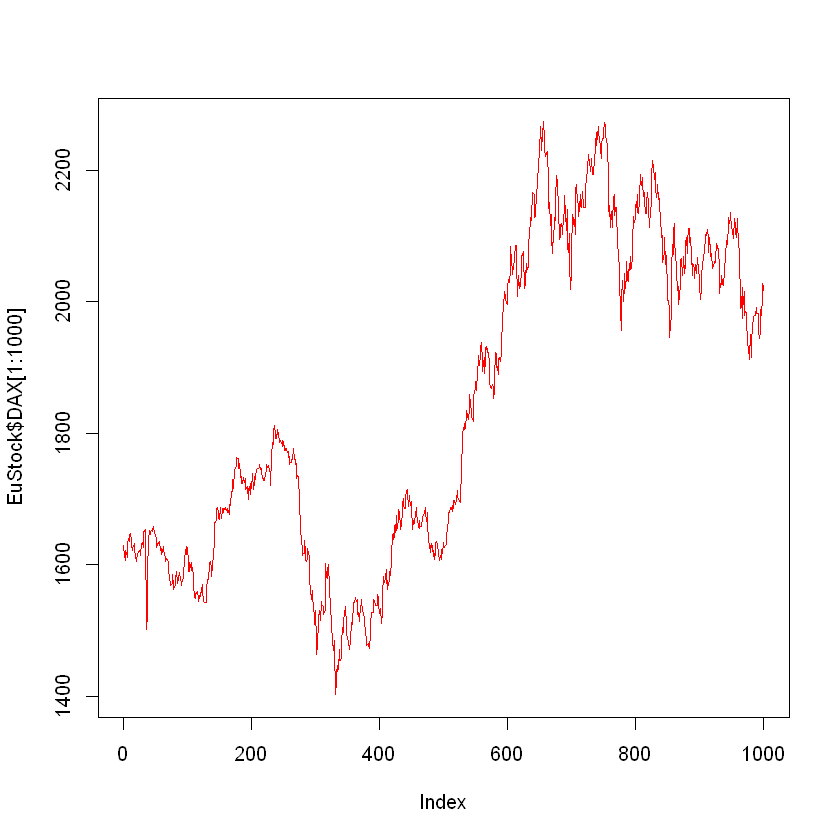

In [23]:
# 선 그래프 시각화
X11()
plot(EuStock$DAX[1:1000], type = 'l', col = 'red')

- 다중 시계열 자료 추세선 시각화

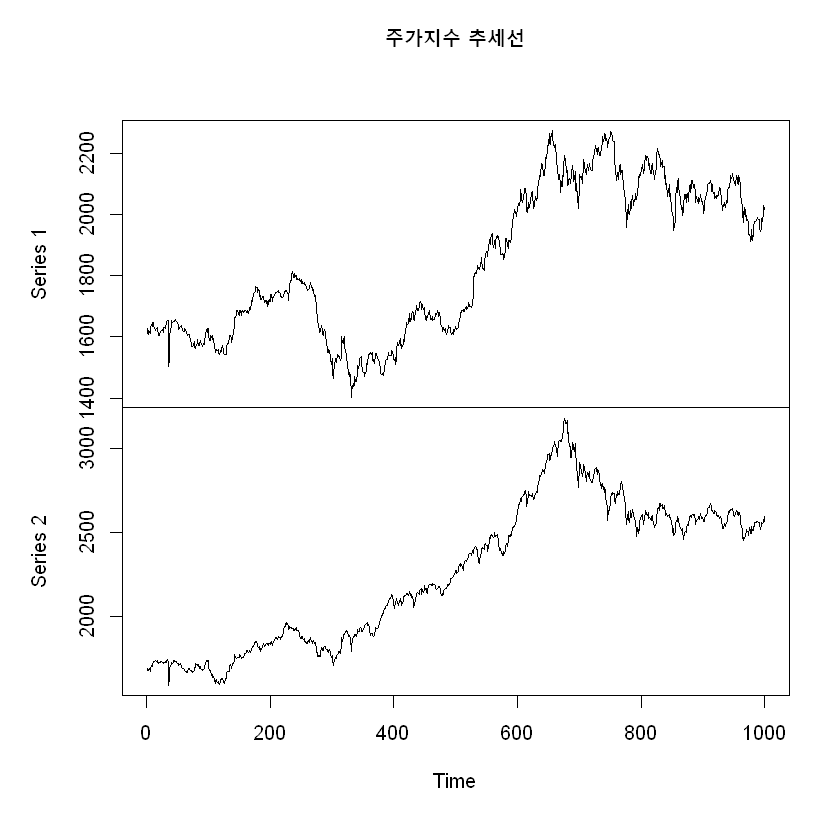

In [24]:
plot.ts(cbind(EuStock$DAX[1:1000],EuStock$SMI[1:1000]),main = '주가지수 추세선')

---

- 시계열 요소 분해 시각화
  - 시간의 변화에 따라 측정된 시계열 자료는 몇 가지 변동요인을 가지며, 이러한 변동요인을 적용하여 시계열 자료를 분석할 수 있다. 
  - 특히 시계열 요소 분해를 통해서 만들어진 그래프를 대상으로 분석하는 자체를 시계열분석 기법으로 포함한다.

- 시계열 자료의 변동요인
  - 1) 추세 변동
  - 2) 순환 변동
  - 3) 계절 변동
  - 4) 불규칙 변동

- 시계열 요소 분해 시각화

In [28]:
# 시계열 자료 준비
data = c(45, 56, 45, 43, 69, 75,58,59,66,64,62,65,55,49,61,55,71,78,71,65,69,43,70,75,56,56,65,55,85,85,75,77,77,69,79,89)

# 시계열 자료 생성 - 시계열 자료 형식으로 객체 생성
tsdata = ts(data, start = c(2016, 1), frequency = 12)
tsdata

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,45,56,45,43,69,75,58,59,66,64,62,65
2017,55,49,61,55,71,78,71,65,69,43,70,75
2018,56,56,65,55,85,85,75,77,77,69,79,89


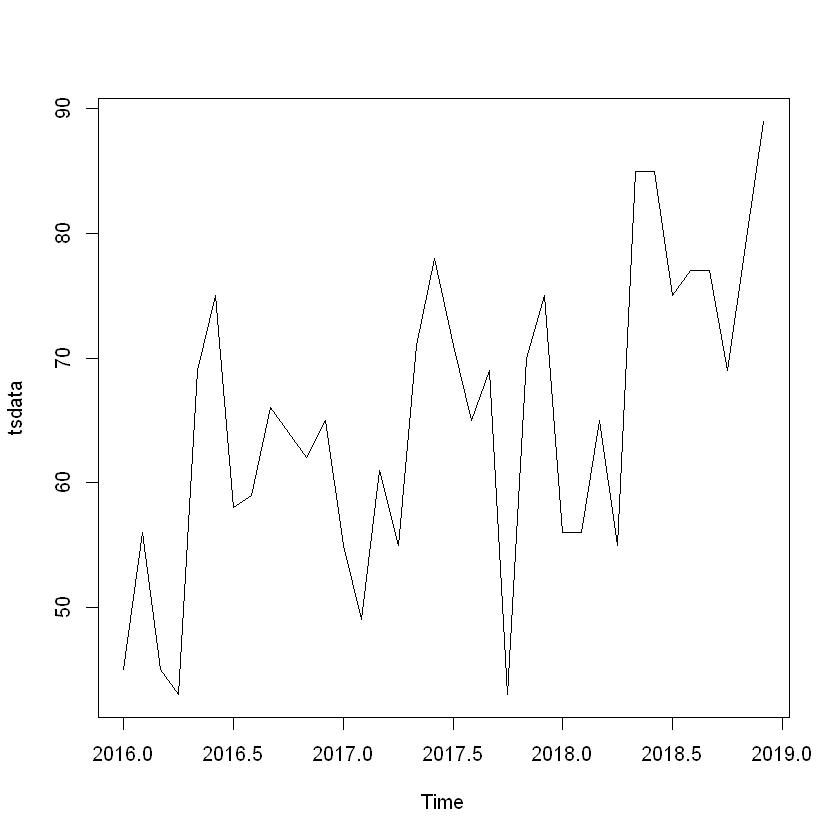

In [29]:
# 추세선 확인 - 각 요인(추세, 순환, 계절, 불규칙)을 시각적으로 확인
ts.plot(tsdata) # = plot(tsdata)

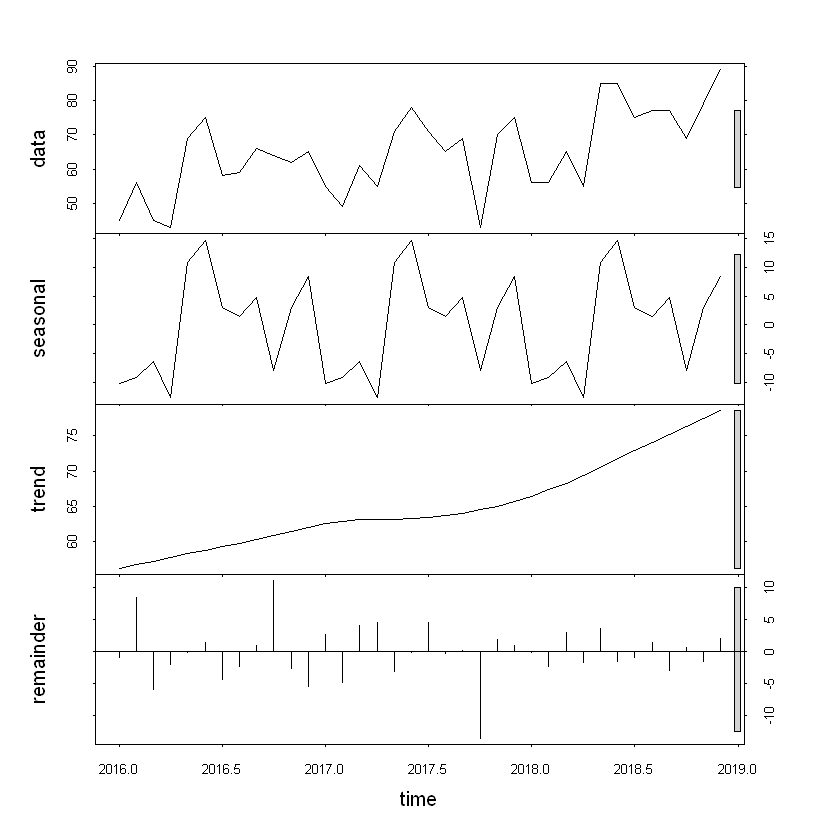

In [31]:
# 시계열 분해
plot(stl(tsdata, 'periodic'))

- stl() 함수는 하나의 시계열 자료를 대상으로 시계열 변동요인인 계절 요소, 추세, 잔차를 모두 제공해준다. 
- 잔차는 회귀식에서 추정된 값과 실제값의 차이를 의미하는데 여기서는 계절과 추세 적합 결과에 의해서 나타난다. 
- 시계열 분해는 시계열의 변동요인을 분석하여 시계열 모형을 선정하는 데 유용한 역할을 제공한다. 

In [32]:
# 시계열 분해와 변동요인 제거
m = decompose(tsdata) # 시계열 분해
attributes(m)

$names
[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"    

$class
[1] "decomposed.ts"

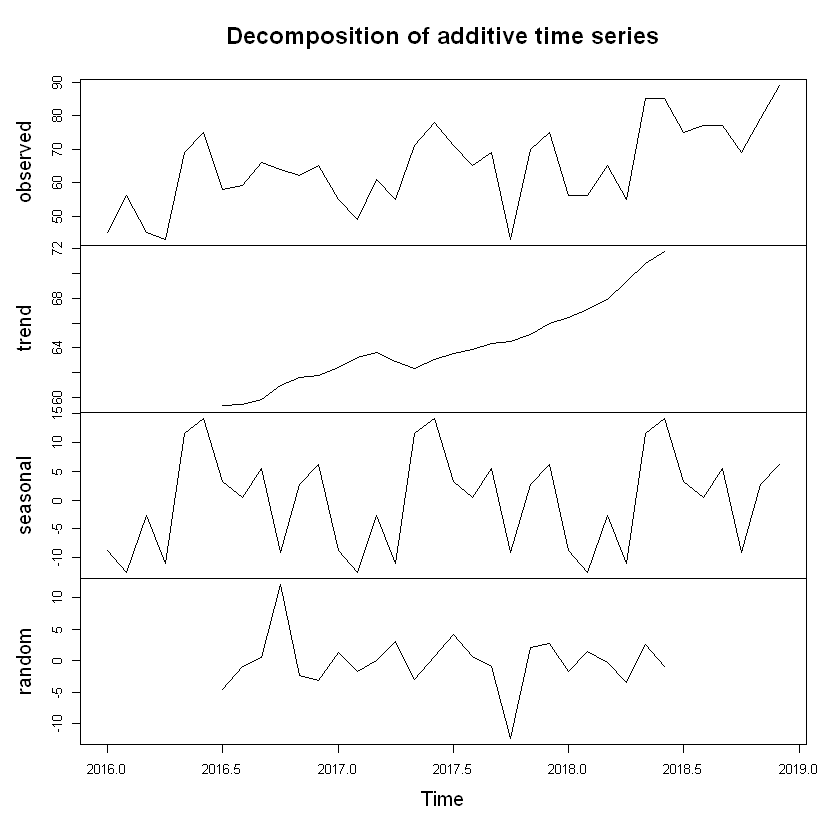

In [35]:
# 추세요인, 계절요인, 불규칙요인이 포함된 그래프
plot(m)

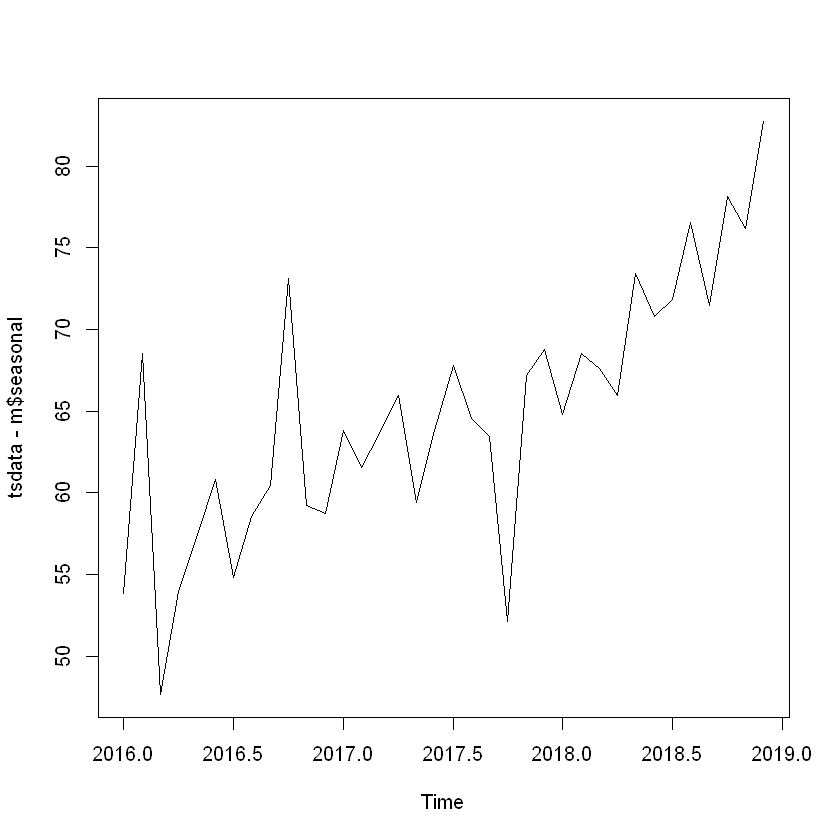

In [36]:
par(mfrow = c(1,1))
plot(tsdata - m$seasonal) # 계절요인을 제거한 그래프

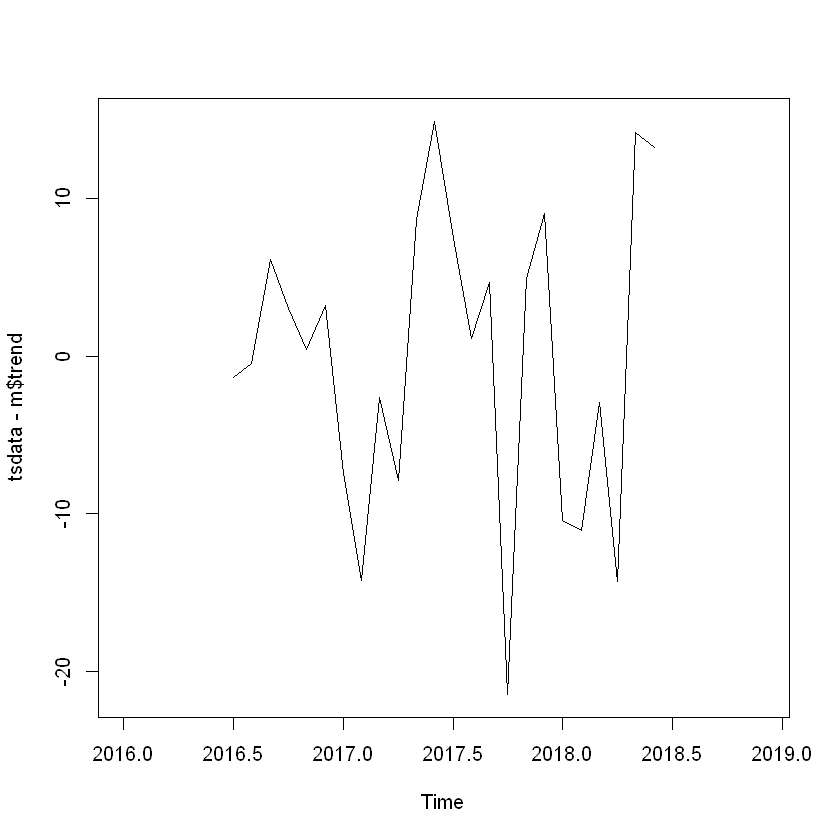

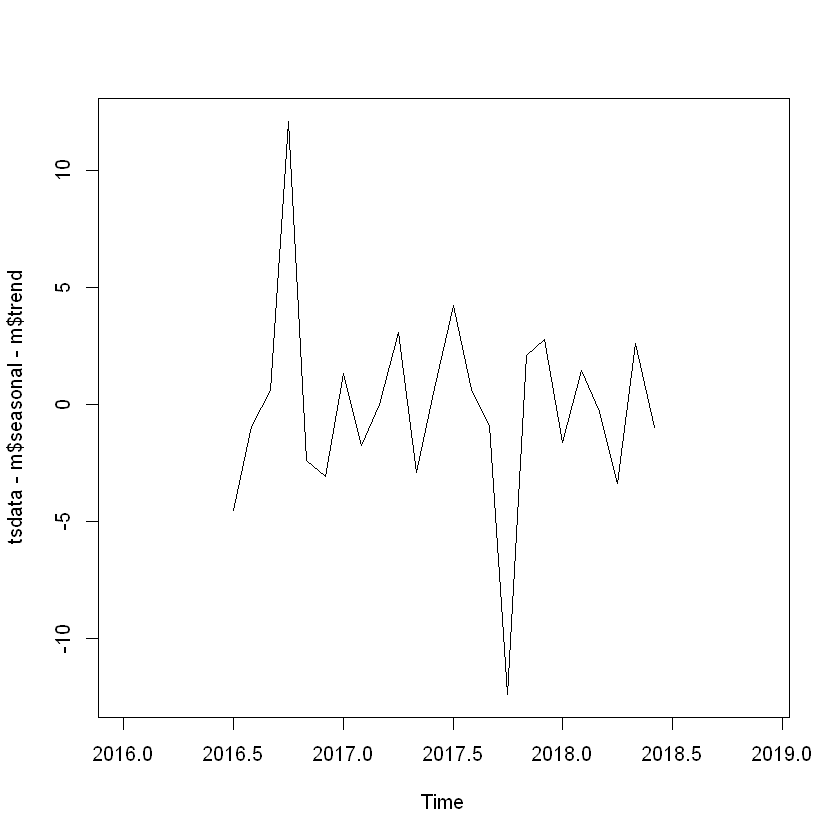

In [39]:
# 계절요인을 제거해봤으니
# 추세요인과 불규칙요인도 제거해보자
plot(tsdata - m$trend) # 추세요인 제거 그래프
plot(tsdata - m$seasonal - m$trend) # 불규칙요인만 출력, 즉, 실제 시계열 자료만 나타낸 결과

---

- 자기 상관 함수, 부분 자기 상관 함수 시각화
  - 자기 상관성은 자기 상관계수가 유의미한가를 나타내는 특성이다. 
  - 여기서 자기 상관계수는 시계열 자료에서 시차를 일정하게 주는 경우 얻어지는 상관계수이다.
  - 자기 상관계수는 서로 이웃한 시점 간의 상관계수를 찾는 데 이용된다.
  - 또한 자기 상관계수는 다른 시차들의 시계열 자료가 미치는 영향을 제거한 후에 주어진 시차에 대한 시계열 간의 상관계수이다. 
  - 특히 자기 상관 함수와 부분 자기 상관 함수는 시계열의 모형을 식별하는 수단으로 이용된다. 

- 시계열 요소 분해 시각화

In [40]:
# 시계열 자료 생성
input = c(3180,3000,3200,3100,3300,3200,3400,3550,3200,3400,3300,3700)
tsdata = ts(input, start = c(2015, 2), frequency = 12)

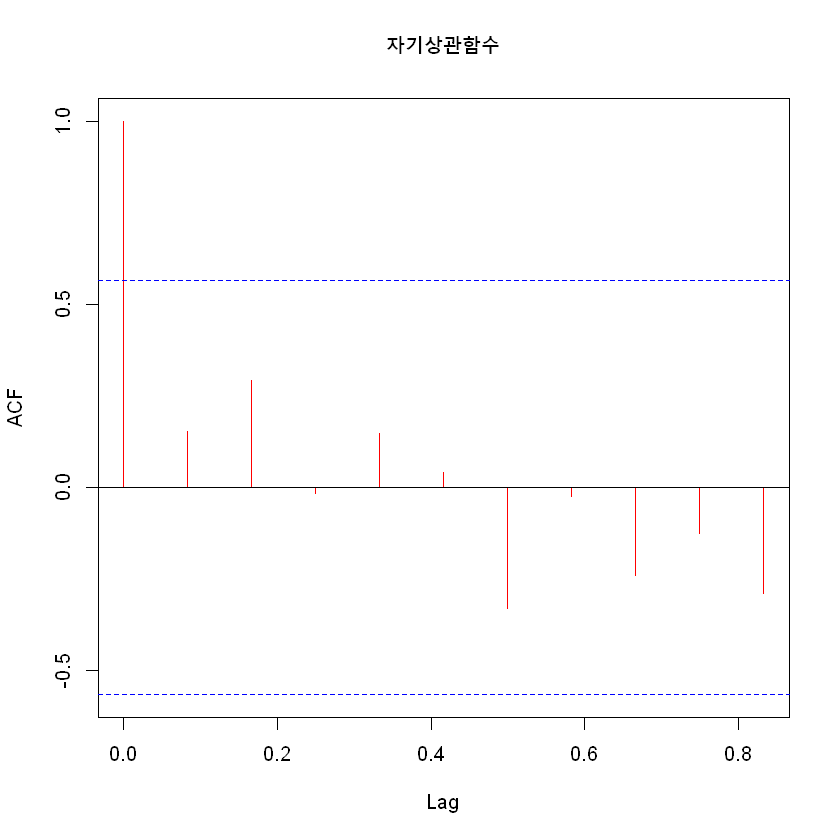

In [43]:
# 자기 상관 함수 시각화
acf(na.omit(tsdata), main = '자기상관함수', col = 'red')

- 파란 점선은 유의미한 자기 상관관계에 대한 임계값을 의미하는데 모든 시차가 파란 점선 안쪽에 있기 때문에 서로 이웃한 시점 간의 자기 상관성은 없는 것으로 해석된다.

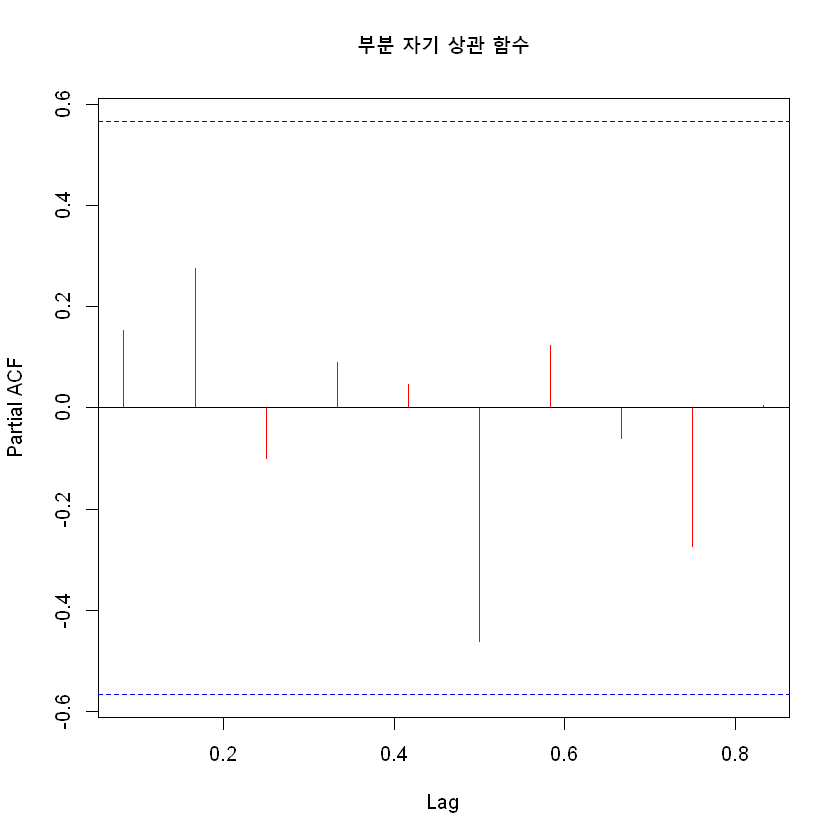

In [45]:
# 부분 자기 상관 함수 시각화
pacf(na.omit(tsdata), main = '부분 자기 상관 함수', col = 'red')

- 부분 자기 상관 함수의 결과 역시 모든 시차가 파란 점선 안쪽에 있기 때문에 주어진 시점 간의 자기 상관성은 없는 것으로 해석된다.

---

- 추세 패턴 찾기 시각화
  - 추세 패턴 : 시계열 자료가 증가 또는 감소하는 경향이 있는지 알아보고, 증가 또는 감소하는 경향이 선형인지 비선형인지를 찾는 과정. 
  - 추세 패턴의 객관적인 근거는 차분과 자기 상관성을 통해서 얻을 수 있는데 여기서 차분은 현재 시점에서 이전 시점의 자료를 빼는 연산을 의미한다.

- 시계열 자료의 추세 패턴 찾기 시각화

In [46]:
# 시계열 자료 생성
input = c(3180,3000,3200,3100,3300,3200,3400,3550,3200,3400,3300,3700)
tsdata = ts(input, start = c(2015, 2), frequency = 12)

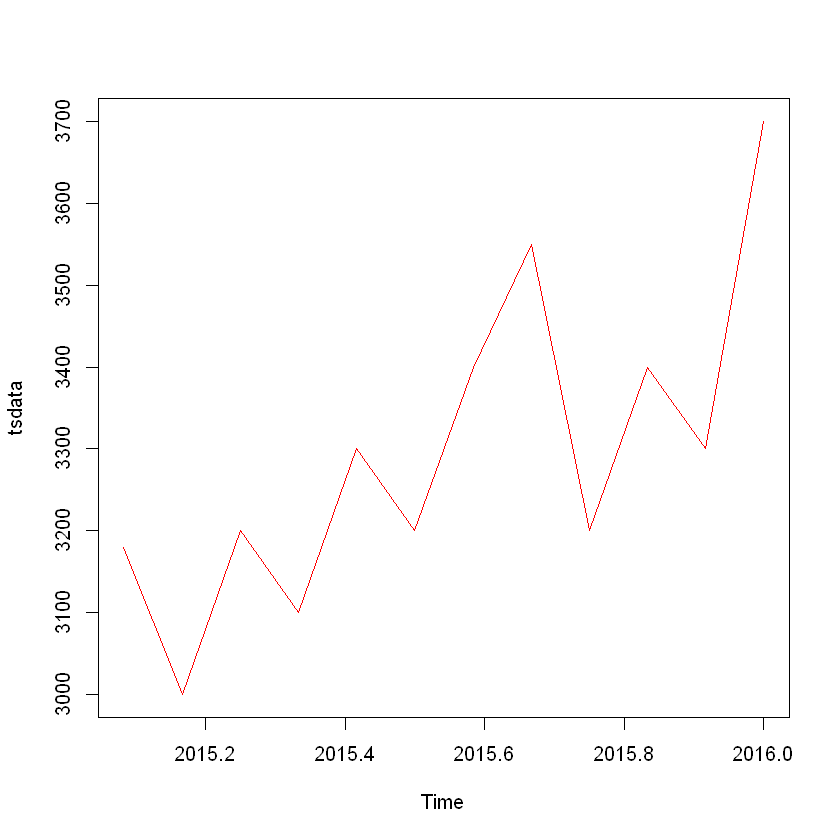

In [47]:
# 추세선 시각화
plot(tsdata, type = 'l', col = 'red')

- 시계열 자료가 점진적으로 증가하는 추세의 선형 형태를 나타낸다.

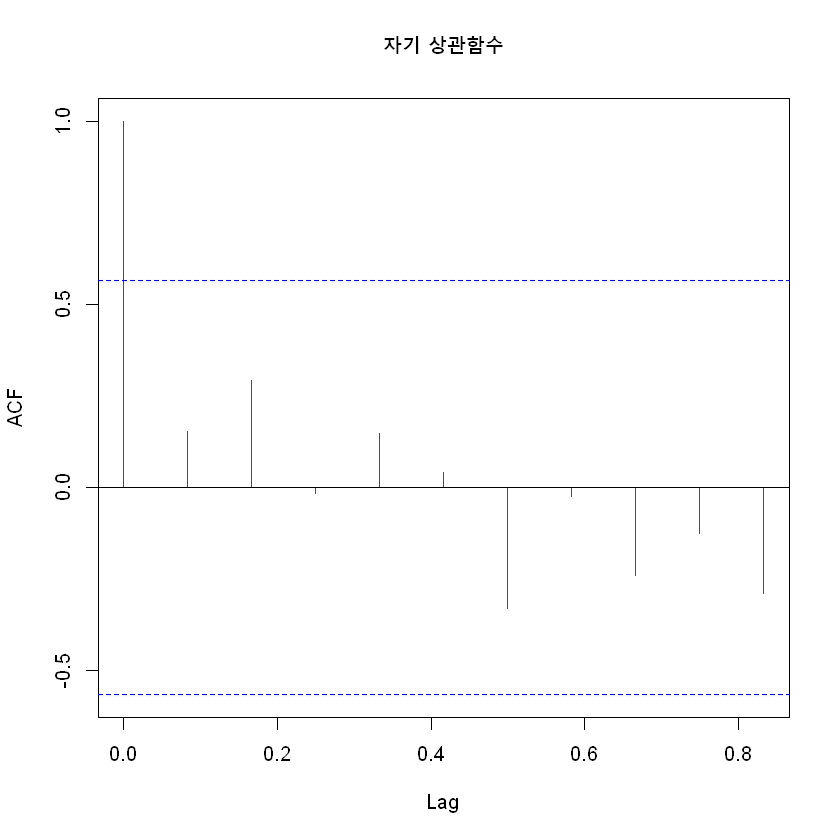

In [48]:
# 자기 상관 함수 시각화
acf(na.omit(tsdata), main = '자기 상관함수', col = 'red')

- 자기 상관성이 없음을 알 수 있다

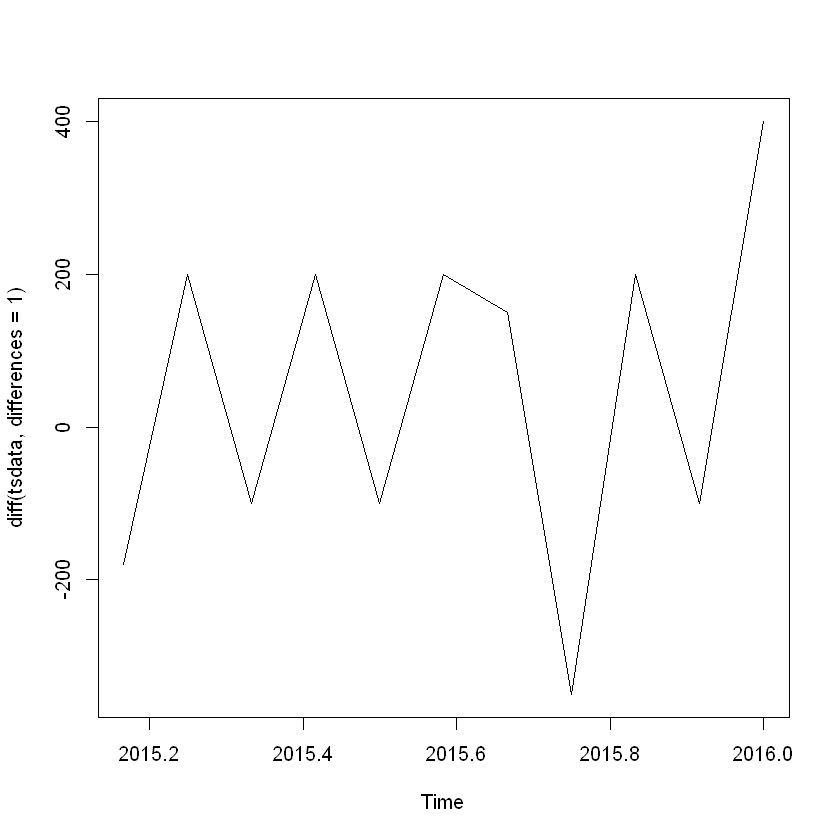

In [49]:
# 차분 시각화
plot(diff(tsdata, differences = 1))

- 결과 그래프는 차분을 수행한 결과가 평균을 중심으로 일정한 폭을 나타내고 있다. 
- 위와 같은 자기 상관 함수와 차분의 시각화를 통해서 추세의 패턴을 선형으로 판단한다. 

---

- 시계열분석 기법
  - 평활법, 시계열 요소 분해법, 회귀 분석법, ARIMA 모형법 등이 있다. 
  - 평활법, 시계열 요소 분해법 : 시각적인 측면에서 직관성을 제공
  - 나머지 : 수학적 이론을 배경으로 1개 이상의 다변량 시계열 데이터를 대상으로 분석하는 방법.

- 시계열 요소 분해법
  - 시계열 자료의 4가지 변동요인을 찾아서 시각적으로 분석하는 기법
  - 대체로 추세와 계절 변동요인은 추세선에서 뚜렷하게 나타난다.
  - 특히 추세 변동에 대한 분석은 시계열 자료가 증가하거나 감소하는 경향이 있는지를 파악하고, 증가나 감소의 경향이 선형인지 비선형인지 또는 s곡선과 같은 성장 곡선인지를 찾는 과정이 필요하다. 
  - 이와 같은 추세의 패턴을 찾는 방법
    - 1) 차분 후 일정한 값을 나타내면 선형의 패턴(대각선)
    - 2) 로그변환 후 일정한 값을 나타내면 비선형의 패턴(U자, 역U자)
    - 3) 로그변환 후 1차 차분결과가 일정한 값으로 나타나면 성장곡선의 패턴(S자)

- 평활법(Smoothing Method)
  - 시계열 자료의 체계적인 자료의 흐름을 파악하기 위해서 `과거 자료의 불규칙한 변동을 제거`하는 방법
  - 즉, 시계열 자료의 뾰족한 작은 변동들을 제거하여 부드러운 곡선으로 시계열 자료를 조정하는 기법
  - 이동평균과 지수평활법이 있다. 

- 이동평균
  - 시계열 자료를 대상으로 일정한 기간의 자료를 평균으로 계산하고, 이동시킨 추세를 파악하여 다음 기간의 추세를 예측하는 방법.

- 지수 평활법
  - 전체 시계열 자료를 이용하여 평균을 구하고 최근 시계열에 더 큰 가중치를 적용하는 방법이다. 

In [50]:
data = c(45,56,45,43,69,75,58,59,66,64,62,65,55,49,67,55,71,78,71,65,69,43,70,75,56,56,65,55,82,85,75,77,77,69,79,89)
tsdata = ts(data, start = c(2016, 1), frequency = 12)
tsdata

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,45,56,45,43,69,75,58,59,66,64,62,65
2017,55,49,67,55,71,78,71,65,69,43,70,75
2018,56,56,65,55,82,85,75,77,77,69,79,89


In [55]:
# 평활관련 패키지
library(TTR)

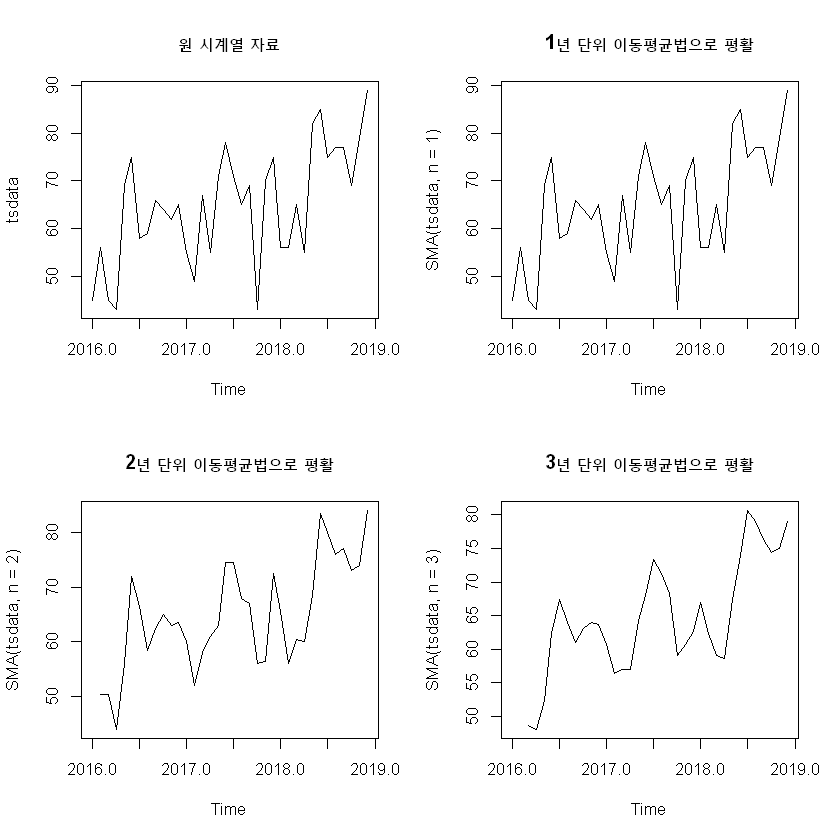

In [60]:
# 이동평균법으로 평활 및 시각화
par(mfrow = c(2,2))
plot(tsdata, main = '원 시계열 자료') # 시계열 자료 시각화
plot(SMA(tsdata, n = 1), main = '1년 단위 이동평균법으로 평활')
plot(SMA(tsdata, n = 2), main = '2년 단위 이동평균법으로 평활')
plot(SMA(tsdata, n = 3), main = '3년 단위 이동평균법으로 평활')

- 연 단위의 3개 평활 결과에서 가장 평탄한 형태로 분포된 결과를 선정하여 추세를 예측하는 데 사용한다. 
- 여기서는 3년마다 평균으로 평활한 결과가 가장 평탄한 값으로 판단된다.

---

- 회귀분석법
  - 시계열 자료는 시간이라는 설명변수에 의해서 어떤 반응변수를 나타내는 것을 말한다. 예를 들면, 매분 매시간 단위로 주식 시세의 데이터가 기록되는 경우 매분, 매시간은 반응변수이고 주식시세의 값은 설명변수에 해당한다. 따라서 선형 회귀분석을 이용하여 시계열 자료의 선형성이나 정규성, 등분산성 등의 모수 검정을 위한 타당성을 검정해야 한다. 